In [2]:
def clear_dict(_dict):
    
    c = 0
    for value in _dict.values(): 
        if value == 0:
            c = c+1
                
    while(c):
        _dict.popitem()
        c = c - 1

In [3]:
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import requests, json   

import datetime 
from datetime import date
year = datetime.date.today().year  
today = date.today()

totalTrend = TrendReq(hl='en-US', tz=360) 

word_input = input("The word you want to know about: ") 
kw_list = [word_input]
_cat = 0
_geo = ''
_gprop = ''   
_resolution = 'COUNTRY'   # "CITY"  "REGION"
_inc_low_vol = False       # + tari mai putin  dezvolate/mici
_inc_geo_code = False 
backoff_factor = 0.4   
final_dict = dict()
    


The word you want to know about: bitcoin


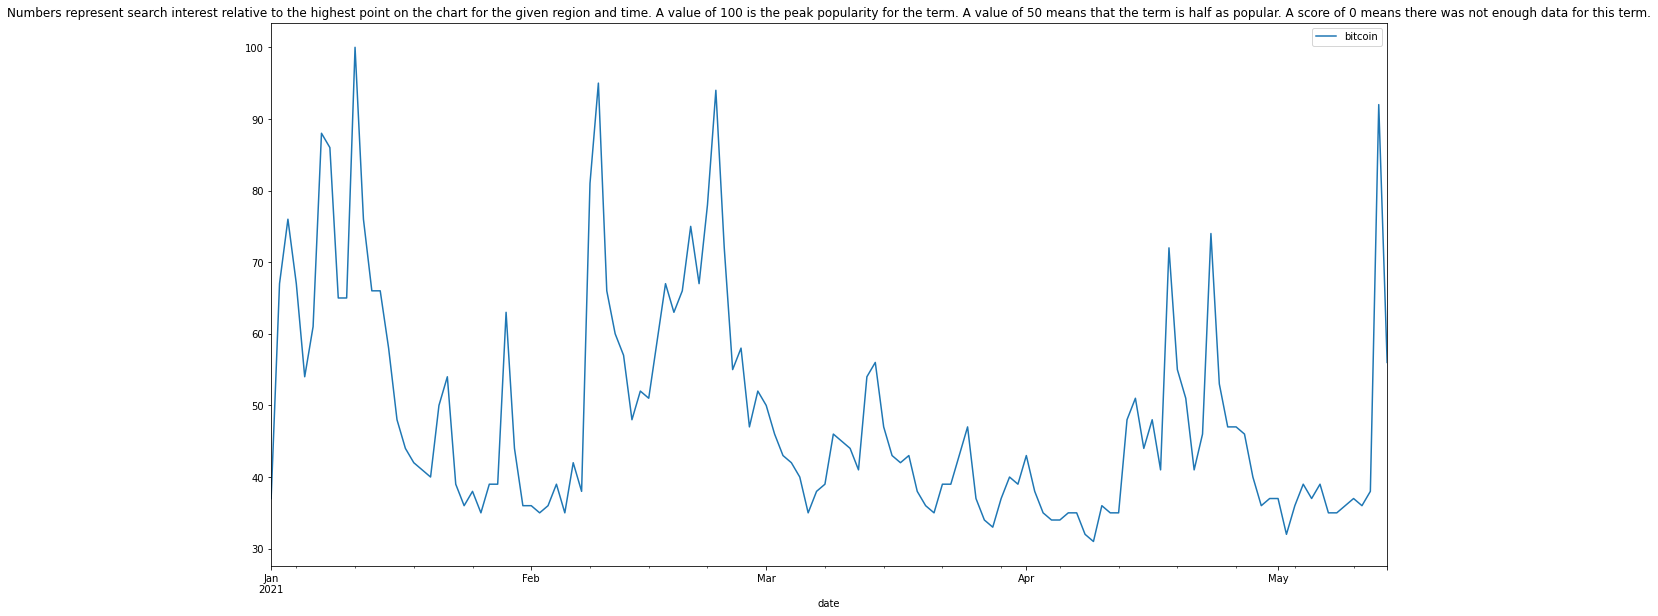

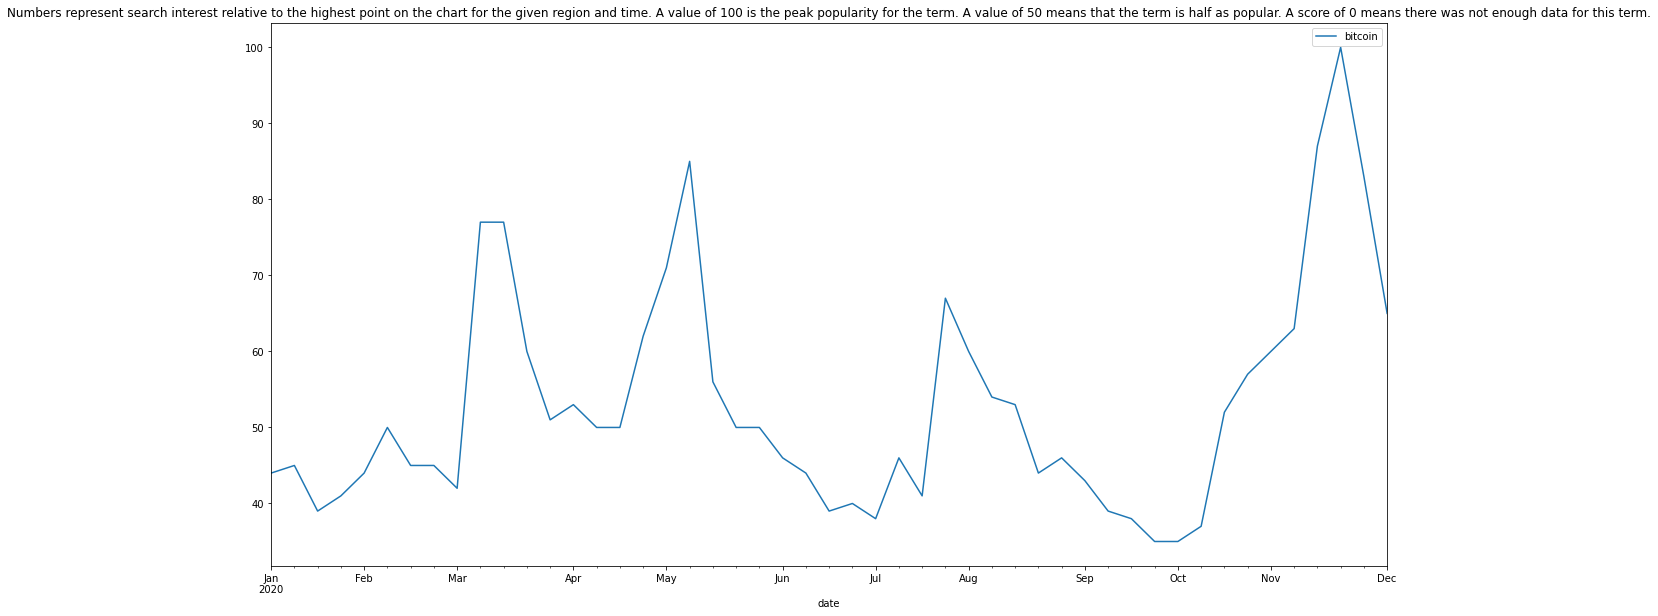

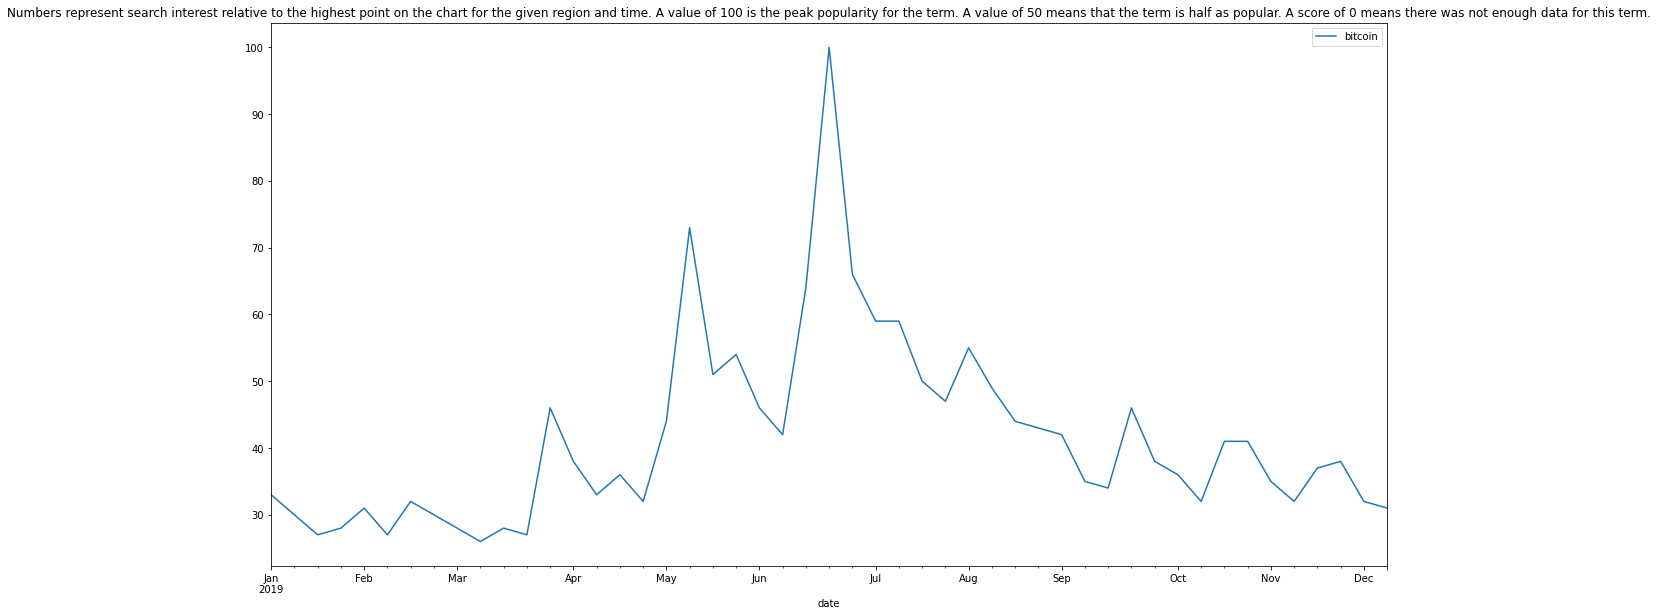

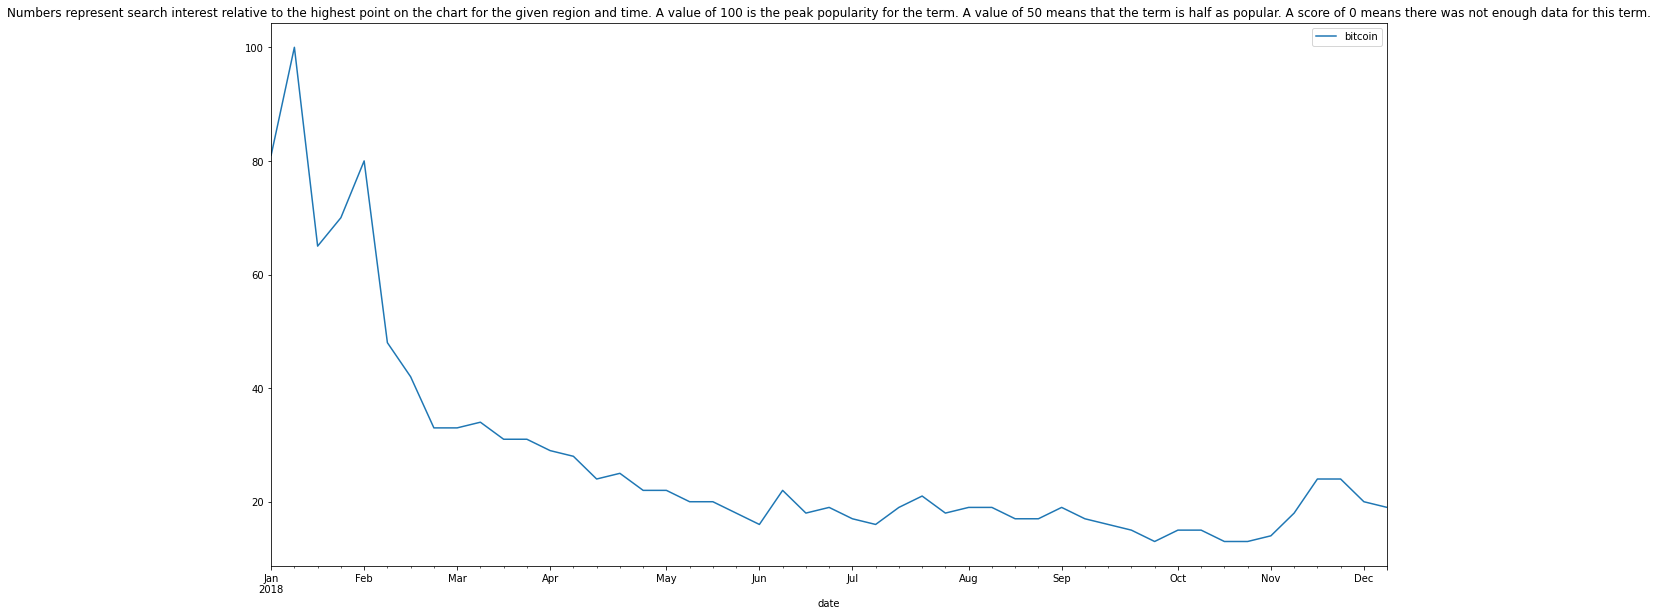

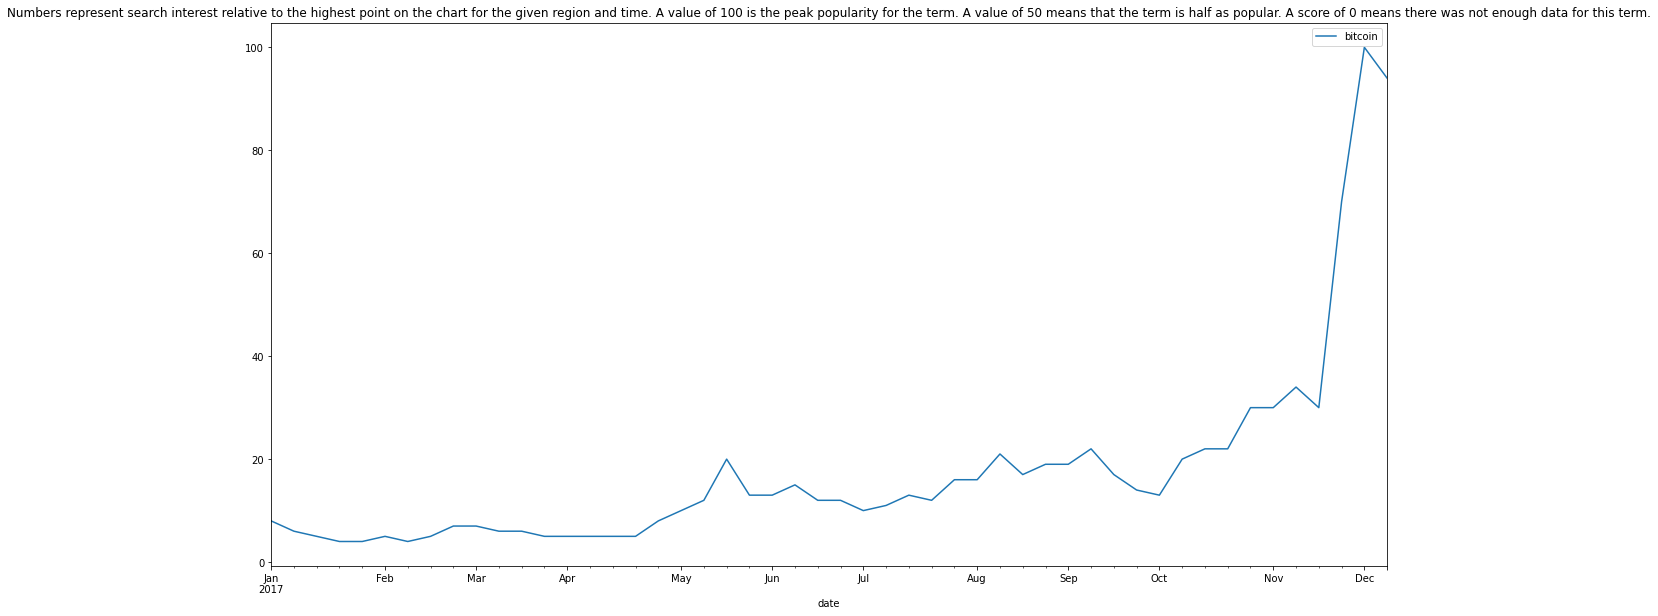

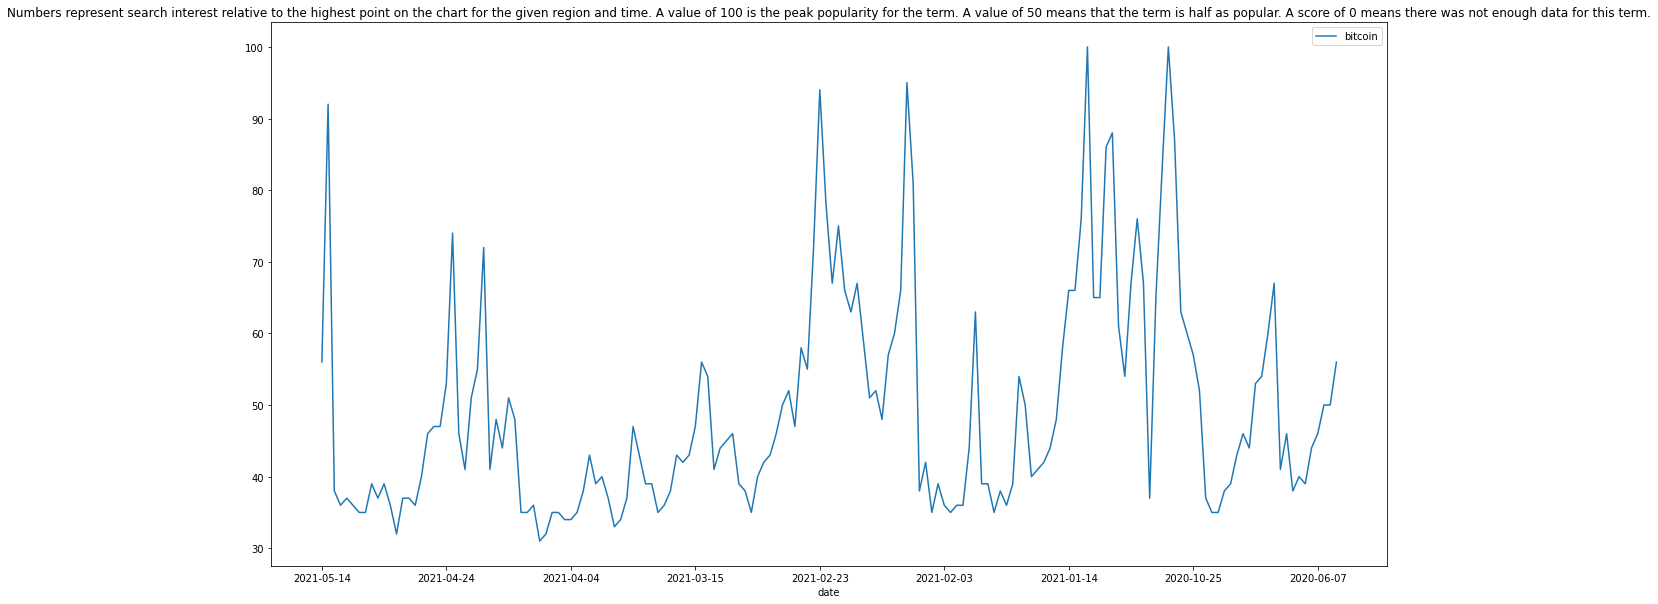

In [4]:
import time
_history_all = pd.DataFrame()
for i in range (0,5):
    if i == 0: 
        _timeframe = f'{year}-01-01 {today.year}-{today.month}-{today.day}' 
    else:
        _timeframe  = f'{year - i}-01-01 {year - i}-12-12'  
        
        
    totalTrend.build_payload(kw_list, cat=_cat, timeframe=_timeframe, geo=_geo, gprop=_gprop) 

# Get interest over time
# Capture Monthly Data for use in Normalization against Weekly
    _history = totalTrend.interest_over_time()  #pandas df
# Plot the Interest 
    text = 'Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.'
    _history.plot(title=text,  figsize=(20,10))
    _history_all = pd.concat([_history_all, _history])
# returns a dataframe with the rating of searches and 
      
    _region= totalTrend.interest_by_region(resolution=_resolution, inc_low_vol= _inc_low_vol, inc_geo_code=_inc_geo_code)   

    _region = _region.sort_values(by=word_input).iloc[::-1] 
    _region_dict = _region[word_input].to_dict() 
    clear_dict(_region_dict) 
    final_dict.update({year-i:_region_dict})

_history_all = _history_all.sort_values('date', ascending = False)
current = _history_all.iloc[0].name
old = current - datetime.timedelta(days = 366)
#print(old, int(time.mktime(old.timetuple())))
_history_all.to_csv('history_trends.csv')
_history_all = pd.read_csv('history_trends.csv')
#print(_history_all['date'])
#print(old.strftime('%Y-%m-%d'))
old_str = old.strftime('%Y-%m-%d')
last_year = _history_all[_history_all['date'] >= old_str]
last_year = last_year.set_index('date')
last_year.plot(title = text, figsize = (20, 10))
plt.savefig('plot.png')

In [5]:
#final_dict

In [6]:
_countries = _region.drop(_region.columns[0], axis = 1)
df_final_dict = pd.DataFrame(final_dict)
df_final_dict.index.name = 'geoName'
df_final_dict
_countries = _countries.merge(df_final_dict, on = 'geoName', how = 'outer')
_countries = _countries.fillna(0)
_region = _countries
#_region

In [7]:

_region = _region.sort_values('geoName', ascending = True)

_region.to_csv('data.csv')

#_region

In [8]:
_region.columns

Index([2021, 2020, 2019, 2018, 2017], dtype='object')

In [9]:
import geopandas as gpd

shapefile = '110m_cultural/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
#gdf.head()

In [10]:
#print(gdf[gdf['country'] == 'Antarctica'])

#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [11]:
import pycountry
datafile = 'data.csv'

#Read csv file using pandas
df = pd.read_csv(datafile)

df = df.drop(df.index[40])
df = df.drop(df.index[116])

#Add country code to dataframe
input_countries = list(df['geoName'])

input_countries[8] = 'Antigua and Barbuda'
input_countries[25] = 'Bolivia, Plurinational State of'
input_countries[26] = 'Bosnia and Herzegovina'
input_countries[31] = 'Virgin Islands, British'
input_countries[32] = 'Brunei Darussalam'
input_countries[39] = 'Cabo Verde'
input_countries[49] = 'Congo'
input_countries[50] = 'Congo, The Democratic Republic of the'
input_countries[58] = "Côte d'Ivoire"
input_countries[71] = "Falkland Islands (Malvinas)"
input_countries[96] = "Heard Island and McDonald Islands"
input_countries[103] = "Iran, Islamic Republic of"
input_countries[118] = "Lao People's Democratic Republic"
input_countries[140] = "Micronesia, Federated States of"
input_countries[141] = "Moldova, Republic of"
input_countries[148] = "Myanmar"
input_countries[160] = "Korea, Democratic People's Republic of"
input_countries[167] = "Palestine, State of"
input_countries[173] = "Pitcairn"
input_countries[179] = "Russian Federation"
input_countries[190] = "Sint Maarten (Dutch part)"
input_countries[196] = "South Georgia and the South Sandwich Islands"
input_countries[197] = "Korea, Republic of"
input_countries[201] = "Saint Barthélemy"
input_countries[202] = "Saint Helena, Ascension and Tristan da Cunha"
input_countries[203] = "Saint Kitts and Nevis"
input_countries[204] = "Saint Lucia"
input_countries[205] = "Saint Martin (French part)"
input_countries[206] = "Saint Pierre and Miquelon"
input_countries[207] = "Saint Vincent and the Grenadines"
input_countries[213] = "Syrian Arab Republic"
input_countries[214] = "Sao Tome and Principe"
input_countries[215] = "Taiwan, Province of China"
input_countries[217] = "Tanzania, United Republic of"
input_countries[223] = "Trinidad and Tobago"
input_countries[210] = "Svalbard and Jan Mayen"
input_countries[227] = "Turks and Caicos Islands"
input_countries[229] = "United States Minor Outlying Islands"
input_countries[230] = "Virgin Islands, U.S."
input_countries[239] = "Holy See (Vatican City State)"
input_countries[240] = "Venezuela, Bolivarian Republic of"
input_countries[241] = "Viet Nam"
input_countries[242] = "Wallis and Futuna"

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2
codes = [countries.get(country, 'Unknown code') for country in input_countries]
#print(codes)

#Add country_code to df
df['country_code'] = codes

#Copy columns name
search_item = df.columns
search_item = search_item[1:-1]

#Reshape data using melt()
df = df.melt(id_vars = ['geoName', 'country_code'],
             var_name = ['search_item'],
             value_name = 'search_interest')

#df.head()

In [12]:
df.info()
search_item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geoName          1240 non-null   object 
 1   country_code     1240 non-null   object 
 2   search_item      1240 non-null   object 
 3   search_interest  1240 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.9+ KB


Index(['2021', '2020', '2019', '2018', '2017'], dtype='object')

In [13]:
gdf = gdf.sort_values('country', ascending = True)

input_countries = list(gdf['country'])

input_countries[15] = 'Bolivia, Plurinational State of'
input_countries[19] = 'Brunei Darussalam'
input_countries[36] = 'Congo, The Democratic Republic of the'
input_countries[40] = 'Timor-Leste'
input_countries[48] = 'Falkland Islands (Malvinas)'
input_countries[52] = 'French Southern Territories'
input_countries[70] = 'Iran, Islamic Republic of'
input_countries[75] = "Côte d'Ivoire"
input_countries[84] = "Lao People's Democratic Republic"
input_countries[92] = 'North Macedonia'
input_countries[99] = 'Moldova, Republic of'
input_countries[113] = "Korea, Democratic People's Republic of"
input_countries[114] = 'Cyprus'
input_countries[118] = 'Palestine, State of'
input_countries[128] = 'Serbia'
input_countries[129] = 'Congo'
input_countries[131] = 'Russian Federation'
input_countries[140] = 'Somalia'
input_countries[142] = 'Korea, Republic of'
input_countries[150] = 'Syrian Arab Republic'
input_countries[151] = 'Taiwan, Province of China'
input_countries[154] = 'Bahamas'
input_countries[164] = 'Tanzania, United Republic of'
input_countries[165] = 'United States'
input_countries[169] = 'Venezuela, Bolivarian Republic of'
input_countries[170] = 'Viet Nam'
input_countries[175] = 'Eswatini'

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2
codes = [countries.get(country, 'Unknown code') for country in input_countries]
codes[81] = 'XK'

#print(codes)

gdf['country_code'] = codes

#gdf

In [14]:
#First lets create a static choropletj map for 'bitcoin'
df_bitcoin = df[df['search_item'] == search_item[0]]

#Merge dataframes gdf and df_bitcoin
merged = gdf.merge(df_bitcoin, left_on = 'country_code', 
                               right_on = 'country_code', how = 'left')

#Replace NaN values to string 'No data'
merged.fillna('No data', inplace = True)

In [15]:
#merged

In [16]:
import json

#Read data to json.
merged_json = json.loads(merged.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [17]:
from selenium import webdriver
path=r"F:\Eduard\Autodezvoltare\NLP camp\final version\NLPC-main\bot\World Map Visualization\chromedriver.exe"
driver=webdriver.Chrome(path)
driver.close()
driver.quit()

In [18]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJson source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['PRGn'][10]

#Reverse color order so that dark blue is hisghest rating
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into
# a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 100, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '10': '10%', '20':'20%', '30':'30%', '40':'40%', '50':'50%', '60':'60%','70':'70%', '80': '80%', '90':'90%', '100': '100%'}

#Create color bar.
color_bar = ColorBar(color_mapper = color_mapper,
                     label_standoff = 10, width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal',
                     major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of search trends', plot_height = 600, plot_width = 950,
           toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure.
p.patches('xs', 'ys', source = geosource, fill_color = {'field' : 'search_interest', 'transform' : color_mapper},
         line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
#output_notebook()
export_png(p, filename = 'world.png')
#Display figure.
#show(p)


'F:\\Eduard\\Autodezvoltare\\NLP camp\\final version\\NLPC-main\\bot\\World Map Visualization\\world.png'